# Raising Awareness Of Air Pollution In Nigeria


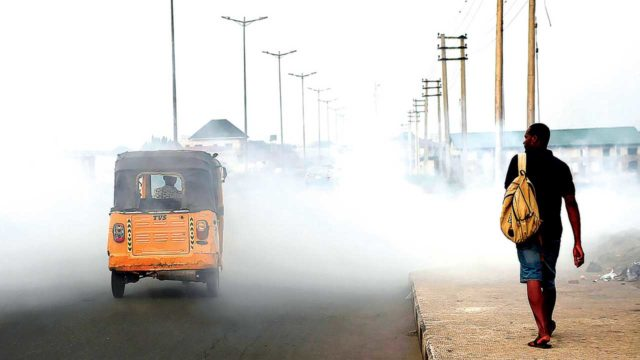

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
url = "https://guardian.ng/wp-content/uploads/2020/04/air-pollution-city-640x360.jpg"
Image(url)

# Port_Harcourt_Pollution_Readings : Preprocessing & Visualization

**Data Analysis** on the proprietory dataset provided by Pyloop 

**Why this analysis** - This Data Analysis aims to leverage data science techniques to raise awareness of Air Polution draw insights about the Air Pollution in Nigeria. The data consistw of sensor readings collected over the last 3 months i.e. July 26, 2021 to October 25, 2021. 

The purpose of the EDA consists of:
1. Applying exploratory data analysis to air quality sensor data to generate useful insights 
2. Using data visualization to create engaging dashboards to raise awareness about air pollution

The EDA, in turn, will facilitate the third step:
3. Perform time series analysis on this data to generate future predictions using machine learning techniques 
 
> - **What does the data consist of?**
    - date and time of reading
    - entry id
    - temperature (in Fahrenheit)
    - humidity (in %)
    - PM2.5 
    
> - Note: PM2.5 refers to fine particulate matter less than 2.5 micrometres in diameter. At elevated levels, they reduce visibility, cause the air to appear hazy, and are a health concern. Some examples of PM2.5 are dust, spores, pollen and emissions from the combustion of diesel, gasoline, oil or wood. Elevated levels of PM2.5 can result in harmful effects such as heart disease, throat infections, lung cancer, chronic bronchitis, asthma attacks, and other respiratory diseases. 

**Tools used in This Analysis** - `Python 3` (`Pandas`& `Numpy` for the data computations and `Matplotlib`, `Seaborn` & `Plotly` for the data visualization).

> - **E**xploratory **D**ata **A**nalysis (EDA)

### What to Expect:

> - Libraries 
> - Data Preparation, Cleaning & Pre-processing
> - Data Visualization
    - Seaborn
    - Matplotlib   

## Importing necessary libraries for analysis



In [2]:
#pip install pandasql

In [3]:
# For data wrangling
import pandas as pd
import numpy as np

# Data visualization modules
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# For queries
import pandasql

# For conversion of object to data time:
from datetime import datetime, timezone

# Interactive Visualizations:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [4]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset and checking the data

In [5]:
# Load the dataset
air = pd.read_csv("/content/drive/MyDrive/AirQuality/Port Harcourt, Nigeria (4.80678 7.002953).csv")

In [6]:
# Preview the top of our data
air.head(10)

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59 UTC,198,89,50,40.78
1,2021-07-26 16:48:03 UTC,199,89,50,40.09
2,2021-07-26 16:49:59 UTC,200,89,50,37.93
3,2021-07-26 16:54:03 UTC,201,89,50,33.18
4,2021-07-26 16:55:59 UTC,202,89,50,37.84
5,2021-07-26 16:58:11 UTC,203,89,50,34.70
6,2021-07-26 17:00:08 UTC,204,89,51,33.83
7,2021-07-26 17:02:05 UTC,205,89,50,36.20
8,2021-07-26 17:04:02 UTC,206,89,50,32.63
9,2021-07-26 17:06:00 UTC,207,88,50,32.60


In [7]:
# Preview the bottom of our data
air.tail(10)

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
56042,2021-10-25 09:18:40 UTC,56240,86,62,28.88
56043,2021-10-25 09:20:40 UTC,56241,86,61,26.74
56044,2021-10-25 09:22:42 UTC,56242,87,61,28.71
56045,2021-10-25 09:24:44 UTC,56243,87,61,31.04
56046,2021-10-25 09:26:47 UTC,56244,87,61,28.90
56047,2021-10-25 09:28:43 UTC,56245,87,61,29.17
56048,2021-10-25 09:30:43 UTC,56246,87,61,29.57
56049,2021-10-25 09:32:44 UTC,56247,87,61,28.75
56050,2021-10-25 09:34:44 UTC,56248,87,61,29.97
56051,2021-10-25 09:36:44 UTC,56249,87,60,30.25


In [8]:
# Checking the shape of our data
air.shape

(56052, 5)

Our dataset has 56052 observations and 5 features/variables.

In [9]:
# Let's describe the data
air.describe()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
count,56052.000000,56052.000000,56052.000000,56052.000000
mean,28223.500000,84.821469,65.117766,54.391926
std,16180.962981,4.319505,8.550730,42.205997
min,198.000000,70.000000,29.000000,0.780000
25%,14210.750000,82.000000,61.000000,30.170000
50%,28223.500000,84.000000,68.000000,41.450000
75%,42236.250000,87.000000,71.000000,61.190000
max,56249.000000,108.000000,89.000000,568.080000


The minimum and max value for the PM2.5 feature are too wide apart. The max and the 75% value are also too far apart as well. This leads to a suspicion of outliers present. We will check for these as we go through the project.

In [10]:
# Checking the info of our data
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       56052 non-null  object 
 1   entry_id         56052 non-null  int64  
 2   Temperature_F    56052 non-null  int64  
 3   Humidity_%       56052 non-null  int64  
 4   PM2.5_ATM_ug/m3  56052 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ MB


The created_at column is an object, however this column's data points are date and time observations which we could transform and separate into date and time columns.

All the other columns are of numeric data type ie. int64 or float64

### Cleaning the data

In [11]:
# Let's check for missing values
air.isnull().sum().sum()

0

We have no null values in the dataset.

In [12]:
# Let's check for duplicates
air.duplicated().sum().sum()

0

There are no duplicated observations.

In [13]:
# Are there any unique values in each column entry in the dataset?
for i in air.columns:
 print(air[i].unique())
 print ("\n")

['2021-07-26 16:45:59 UTC' '2021-07-26 16:48:03 UTC'
 '2021-07-26 16:49:59 UTC' ... '2021-10-25 09:32:44 UTC'
 '2021-10-25 09:34:44 UTC' '2021-10-25 09:36:44 UTC']


[  198   199   200 ... 56247 56248 56249]


[ 89  88  87  86  85  84  83  82  81  78  90  91  92  93  94  96  95  97
  98  99 100 101 102  79  80  75  76  77 103  73 104 105 106  70  74 107
 108  72]


[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 49 48 47 46 45 44
 43 42 41 40 39 38 37 36 35 34 33 30 29 31 32 68 70 71 72 69 86 85 84 83
 82 81 80 79 78 77 76 75 74 73 87 89 88]


[40.78 40.09 37.93 ... 83.85 80.34  6.64]




There are no unique values. This is because our data does not consist of categorical variables. All varaiables are continuous in nature and of date-time type.

(56052, 4)


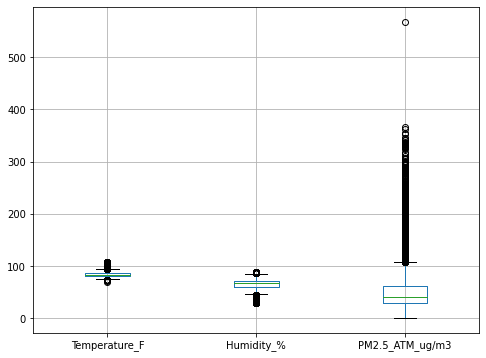

In [14]:
# checking for outliers 
air_out = air.drop(['entry_id'],axis=1) 
air_out.boxplot(figsize=(8, 6), fontsize=10)

# print size of the data with outliers present
print(air_out.shape)

In [15]:
# Let's check the ouliers present in the PM2.5 clearly 
# as the boxplot is not quite as clear.

# Checking for outliers in the PM2.5 column

Q1 = air["PM2.5_ATM_ug/m3"].quantile(0.25)
Q3 = air["PM2.5_ATM_ug/m3"].quantile(0.75)

IQR = Q3 - Q1

outliers = ((air["PM2.5_ATM_ug/m3"] < Q1 - 1.5 * IQR) | (air["PM2.5_ATM_ug/m3"] > Q3 + 1.5 * IQR))
outliers.value_counts()

False    50004
True      6048
Name: PM2.5_ATM_ug/m3, dtype: int64

In [16]:
# Checking for outliers in the Temperature_F column

Q1 = air["Temperature_F"].quantile(0.25)
Q3 = air["Temperature_F"].quantile(0.75)

IQR = Q3 - Q1

outliers = ((air["Temperature_F"] < Q1 - 1.5 * IQR) | (air["Temperature_F"] > Q3 + 1.5 * IQR))
outliers.value_counts()

False    54304
True      1748
Name: Temperature_F, dtype: int64

In [17]:
# Checking for outliers in the Humidity_% column

Q1 = air["Humidity_%"].quantile(0.25)
Q3 = air["Humidity_%"].quantile(0.75)

IQR = Q3 - Q1

outliers = ((air["Humidity_%"] < Q1 - 1.5 * IQR) | (air["Humidity_%"] > Q3 + 1.5 * IQR))
outliers.value_counts()

False    54322
True      1730
Name: Humidity_%, dtype: int64

Seems that there are quite a number of outliers in the columns;

* PM2.5 column (6048 outlires)

* Temperature_F (1748 outliers)

* Humidity_% (1730 outliers)

However we will not drop them as they could be relevant to the study.

In [18]:
# Let's transform the created_at column into date and time
# First Let's create a copy of our data set
air_df = air.copy()

# Let's check if our copy has been made
air_df.head()

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59 UTC,198,89,50,40.78
1,2021-07-26 16:48:03 UTC,199,89,50,40.09
2,2021-07-26 16:49:59 UTC,200,89,50,37.93
3,2021-07-26 16:54:03 UTC,201,89,50,33.18
4,2021-07-26 16:55:59 UTC,202,89,50,37.84


In [19]:
# Convert date and time to appropriate dtypes
air_df['created_at'] = pd.to_datetime(air_df['created_at'])

In [20]:
# Lets check if the dtype has changed
air_df.created_at.dtype

datetime64[ns, UTC]

In [21]:
# Let's separate the column created_at into date and time columns
air_df['date'] = pd.to_datetime(air_df['created_at']).dt.date
air_df['time'] = pd.to_datetime(air_df['created_at']).dt.time

In [22]:
# Let's check if our columns have been created
air_df.head()

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,date,time
0,2021-07-26 16:45:59+00:00,198,89,50,40.78,2021-07-26,16:45:59
1,2021-07-26 16:48:03+00:00,199,89,50,40.09,2021-07-26,16:48:03
2,2021-07-26 16:49:59+00:00,200,89,50,37.93,2021-07-26,16:49:59
3,2021-07-26 16:54:03+00:00,201,89,50,33.18,2021-07-26,16:54:03
4,2021-07-26 16:55:59+00:00,202,89,50,37.84,2021-07-26,16:55:59


Our columns have been created so let's drop the created_at column.

In [23]:
# Dropping the created_at column
#air_df.drop(columns=['created_at'],inplace=True)
#checking if column is dropped
#air_df.head()

In [24]:
# Rearranging the columns
air_df = air_df[['created_at','date', 'time', 'Temperature_F', 'Humidity_%','PM2.5_ATM_ug/m3']]
# Let's check the rearrangement
air_df.head()

,created_at,date,time,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,89,50,40.78
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,89,50,40.09
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,89,50,37.93
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,89,50,33.18
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,89,50,37.84


In [25]:
# checking the data type for the date and time columns
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       56052 non-null  datetime64[ns, UTC]
 1   date             56052 non-null  object             
 2   time             56052 non-null  object             
 3   Temperature_F    56052 non-null  int64              
 4   Humidity_%       56052 non-null  int64              
 5   PM2.5_ATM_ug/m3  56052 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 2.6+ MB


In [26]:
# convert date column and time column to appropriate dtype
# convert the 'Date' column to datetime format
air_df['date']= pd.to_datetime(air_df['date'])

In [27]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       56052 non-null  datetime64[ns, UTC]
 1   date             56052 non-null  datetime64[ns]     
 2   time             56052 non-null  object             
 3   Temperature_F    56052 non-null  int64              
 4   Humidity_%       56052 non-null  int64              
 5   PM2.5_ATM_ug/m3  56052 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.6+ MB


In [28]:
# Creating a month column by extracting months from the date column
air_df['month'] = air_df['date'].dt.month
# Let's check the column month
air_df.head()

,created_at,date,time,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,month
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,89,50,40.78,7
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,89,50,40.09,7
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,89,50,37.93,7
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,89,50,33.18,7
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,89,50,37.84,7


In [29]:
# convert a month number to month name
import calendar
air_df['month'] = air_df['month'].apply(lambda x: calendar.month_abbr[x]) # got converting code from stack overflow

In [30]:
# checking for unique values in the month column
print(air_df.month.unique())

['Jul' 'Aug' 'Sep' 'Oct']


The months in which the data seem to have been collected are from the months; July(7), August(8), September(9) and October(10).

In [31]:
# Creating a year column by extracting months from the date column
air_df['year'] = air_df['date'].dt.year
# Let's check the column month
air_df.head()

,created_at,date,time,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,month,year
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,89,50,40.78,Jul,2021
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,89,50,40.09,Jul,2021
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,89,50,37.93,Jul,2021
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,89,50,33.18,Jul,2021
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,89,50,37.84,Jul,2021


In [32]:
# checking for unique values in the month column
print(air_df.year.unique())

[2021]


The data is from just a specific year ie. 2021

In [33]:
# Rearranging the columns again
air_df = air_df[['created_at','date', 'time','month','year', 'Temperature_F', 'Humidity_%','PM2.5_ATM_ug/m3']]
# Let's check the rearrangement
air_df.head()

,created_at,date,time,month,year,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,Jul,2021,89,50,40.78
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,Jul,2021,89,50,40.09
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,Jul,2021,89,50,37.93
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,Jul,2021,89,50,33.18
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,Jul,2021,89,50,37.84


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f331e5fc5d0>]],
      dtype=object)

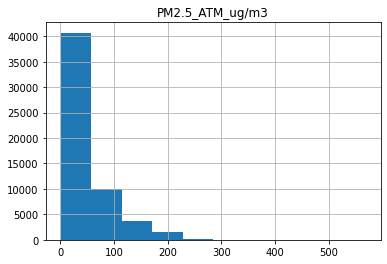

In [34]:

air_df.hist('PM2.5_ATM_ug/m3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f331e5c12d0>]],
      dtype=object)

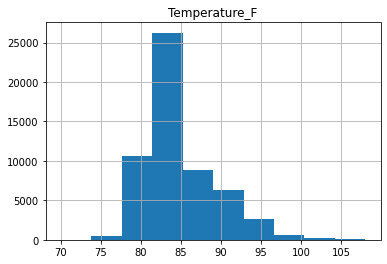

In [35]:
air_df.hist('Temperature_F')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f331e4a8e10>]],
      dtype=object)

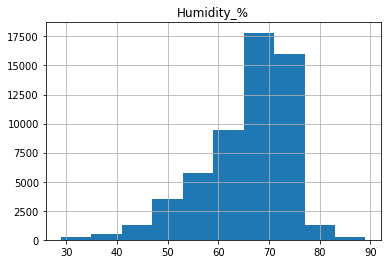

In [36]:
air_df.hist('Humidity_%')

# Indu's part

In [37]:
df = air

In [38]:
df.shape

(56052, 5)

In [39]:
# Random Query on number of entries with temp > 80F out of the total data entries
sub_df = df[df["Temperature_F"] > 80]
ans = round((len(sub_df)/len(df))*100,1)
print("The temperature in Port Harcourt was above 80F in {}% of the entries".format(ans))

The temperature in Port Harcourt was above 80F in 89.9% of the entries


In [40]:
# Renaming Columns
df.rename(columns={"created_at":"datetime", "entry_id":"id","Temperature_F":"temp","Humidity_%":"humidity", "PM2.5_ATM_ug/m3": "pm", 
                             }, inplace=True)

In [41]:
# Checking column name changes
print(df.columns)
df.columns[0]

Index(['datetime', 'id', 'temp', 'humidity', 'pm'], dtype='object')


'datetime'

**Note** - There is no instance of 2 or more columns providing the same information in the dataset i.e. no columns need to be dropped.

In [42]:
# Random Query on number of entries with 'Unhealthy' AQI 
sub_df = pandasql.sqldf("SELECT * FROM df WHERE pm > 34 and pm < 151;", globals())
ans = round((len(sub_df)/len(df))*100,1)
print("The air quality index in Port Harcourt is rated 'Unhealthy' in {}% of the entries".format(ans))

The air quality index in Port Harcourt is rated 'Unhealthy' in 61.1% of the entries


In [43]:
df_s = df[['temp','humidity','pm']]
df_s.head()

,temp,humidity,pm
0,89,50,40.78
1,89,50,40.09
2,89,50,37.93
3,89,50,33.18
4,89,50,37.84


In [44]:
# Creating copy of modified dataset
dff = df.copy()
print(id(df))
id(dff)

139857570401808


139857529125648

***Note:*** There is a high negative correlation between temperature and humidity.  This has significant value during the predictive modeling phase of the project. On the other hand, while not significant, a negative correlation exists between PM and temperature.  There exists a similar correlation (positive) between PM and humidity. 

In [45]:
# Drop duplicates
df = df.drop_duplicates()
df.shape                            #Results when compared to the one earlier point to the absence of duplicates

(56052, 5)

In [46]:
# Converting date column from object to datatime 
dff['datetime'] = pd.to_datetime(dff['datetime'])
dff.dtypes

datetime    datetime64[ns, UTC]
id                        int64
temp                      int64
humidity                  int64
pm                      float64
dtype: object

In [47]:
#Converting time zone from UTC to Africa/Lagos to reflect local time in Port Harcourt
dff['datetime'] = dff['datetime'].dt.tz_convert('Africa/Lagos')
sub_data = pandasql.sqldf("SELECT * FROM dff LIMIT 10;", globals())
print(sub_data)

                     datetime   id  temp  humidity     pm
0  2021-07-26 17:45:59.000000  198    89        50  40.78
1  2021-07-26 17:48:03.000000  199    89        50  40.09
2  2021-07-26 17:49:59.000000  200    89        50  37.93
3  2021-07-26 17:54:03.000000  201    89        50  33.18
4  2021-07-26 17:55:59.000000  202    89        50  37.84
5  2021-07-26 17:58:11.000000  203    89        50  34.70
6  2021-07-26 18:00:08.000000  204    89        51  33.83
7  2021-07-26 18:02:05.000000  205    89        50  36.20
8  2021-07-26 18:04:02.000000  206    89        50  32.63
9  2021-07-26 18:06:00.000000  207    88        50  32.60


In [48]:
dff.dtypes

datetime    datetime64[ns, Africa/Lagos]
id                                 int64
temp                               int64
humidity                           int64
pm                               float64
dtype: object

In [49]:
# Setting datetime column as index for the dataframe(dff)
dff = dff.set_index('datetime')
dff.index

DatetimeIndex(['2021-07-26 17:45:59+01:00', '2021-07-26 17:48:03+01:00',
               '2021-07-26 17:49:59+01:00', '2021-07-26 17:54:03+01:00',
               '2021-07-26 17:55:59+01:00', '2021-07-26 17:58:11+01:00',
               '2021-07-26 18:00:08+01:00', '2021-07-26 18:02:05+01:00',
               '2021-07-26 18:04:02+01:00', '2021-07-26 18:06:00+01:00',
               ...
               '2021-10-25 10:18:40+01:00', '2021-10-25 10:20:40+01:00',
               '2021-10-25 10:22:42+01:00', '2021-10-25 10:24:44+01:00',
               '2021-10-25 10:26:47+01:00', '2021-10-25 10:28:43+01:00',
               '2021-10-25 10:30:43+01:00', '2021-10-25 10:32:44+01:00',
               '2021-10-25 10:34:44+01:00', '2021-10-25 10:36:44+01:00'],
              dtype='datetime64[ns, Africa/Lagos]', name='datetime', length=56052, freq=None)

In [50]:
# Adding columns with year, month, day and weekday name; breaking down components of time into hour, minutes and seconds
dff['year'] = dff.index.year
dff['month'] = dff.index.month
dff['day'] = dff.index.day
dff['weekday'] = dff.index.day_name()
dff['hr'] = dff.index.hour
dff['min'] = dff.index.minute
dff['sec'] = dff.index.second

In [51]:
#Check
dff.head()

,id,temp,humidity,pm,year,month,day,weekday,hr,min,sec
datetime,,,,,,,,,,,
2021-07-26 17:45:59+01:00,198,89,50,40.78,2021,7,26,Monday,17,45,59
2021-07-26 17:48:03+01:00,199,89,50,40.09,2021,7,26,Monday,17,48,3
2021-07-26 17:49:59+01:00,200,89,50,37.93,2021,7,26,Monday,17,49,59
2021-07-26 17:54:03+01:00,201,89,50,33.18,2021,7,26,Monday,17,54,3
2021-07-26 17:55:59+01:00,202,89,50,37.84,2021,7,26,Monday,17,55,59


In [52]:
# checking for null values in column 'pm'
dff['pm'].isnull().sum()

0

In [53]:
# Creating a copy of the dataframe (dff)
dfv = dff.copy()
print(id(dfv))
print(id(dff))

139857497455632
139857529412240


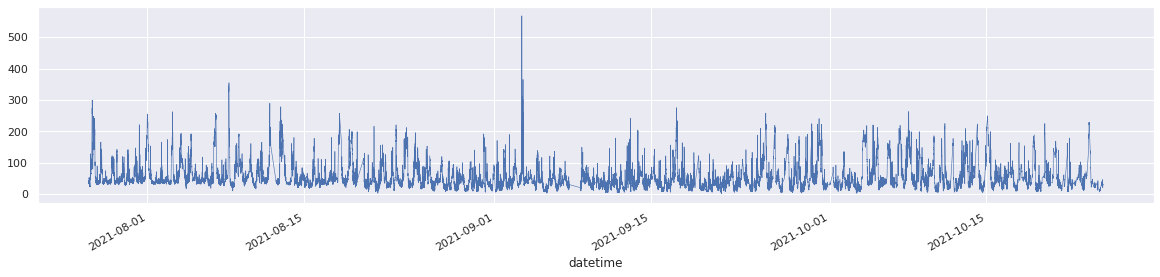

In [54]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 4)})
sns.set_style('darkgrid')
dfv['pm'].plot(linewidth=0.6); 
#No discernible trend is seen in the particulate readings; however,
#a significant spike in poor air quality can be observed around the first week of September 2021

### Q: Determine the number & % of entries in each AQI category over the timeframe of the dataset?

pm
Good               2067
Moderate          18022
Unhealthy-S       19599
Unhealthy         13363
Very Unhealthy     2873
Hazardous           128
dtype: int64


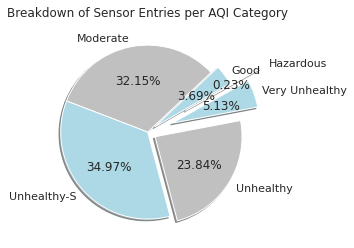

In [55]:
# Calculate the number of entries in each AQI category:
bins = [0, 12, 35, 55, 150, 250, 600]
labels = ['Good', 'Moderate', 'Unhealthy-S','Unhealthy','Very Unhealthy','Hazardous']
s = dfv.groupby(pd.cut(dfv['pm'], bins=bins, labels = labels)).size()
print(s)

# Pie Chart
colours = ['lightblue', 'silver']
plt.title('Breakdown of Sensor Entries per AQI Category', pad=7)
plt.pie(s, labels=s.index, startangle=30, autopct='%.2f%%', explode = (0.1, 0.0, 0, 0.1, 0.3 ,0.5), shadow=True, colors=colours);

In [56]:
# Creating a separate 'binned' category column
dfv['binned'] = pd.cut(x=dfv['pm'], bins=[0, 12, 35, 55, 150, 250, 600], labels=['Good', 'Moderate', 'Unhealthy-S','Unhealthy','Very Unhealthy','Hazardous'])

In [57]:
dfv.head()

,id,temp,humidity,pm,year,month,day,weekday,hr,min,sec,binned
datetime,,,,,,,,,,,,
2021-07-26 17:45:59+01:00,198,89,50,40.78,2021,7,26,Monday,17,45,59,Unhealthy-S
2021-07-26 17:48:03+01:00,199,89,50,40.09,2021,7,26,Monday,17,48,3,Unhealthy-S
2021-07-26 17:49:59+01:00,200,89,50,37.93,2021,7,26,Monday,17,49,59,Unhealthy-S
2021-07-26 17:54:03+01:00,201,89,50,33.18,2021,7,26,Monday,17,54,3,Moderate
2021-07-26 17:55:59+01:00,202,89,50,37.84,2021,7,26,Monday,17,55,59,Unhealthy-S


In [58]:
# Random Query on number of entries with 'Unhealthy' and worse AQI 
sub_dfv = pandasql.sqldf("SELECT * FROM dfv WHERE pm > 34 and pm < 500;", globals())
ans = round((len(sub_dfv)/len(dfv))*100,1)
print("The air quality index in Port Harcourt is rated 'Unhealthy & Worse' in {}% of the entries".format(ans))

The air quality index in Port Harcourt is rated 'Unhealthy & Worse' in 66.4% of the entries


### Q. Which day of the week has the highest no. of entries in the 'hazardous' and above categories?

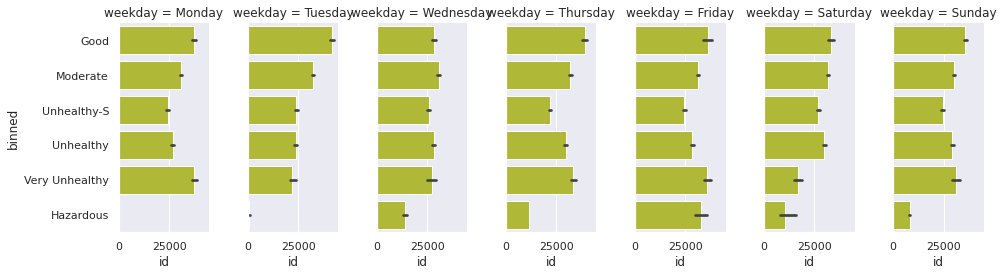

In [59]:
p = sns.g = sns.FacetGrid(dfv, col="weekday", height=4, aspect=.5);
p.map(sns.barplot, 'id',"binned", color="#C2CD23", order=['Good','Moderate', 'Unhealthy-S','Unhealthy','Very Unhealthy','Hazardous']);
# Friday appears to be the worst day of the week 

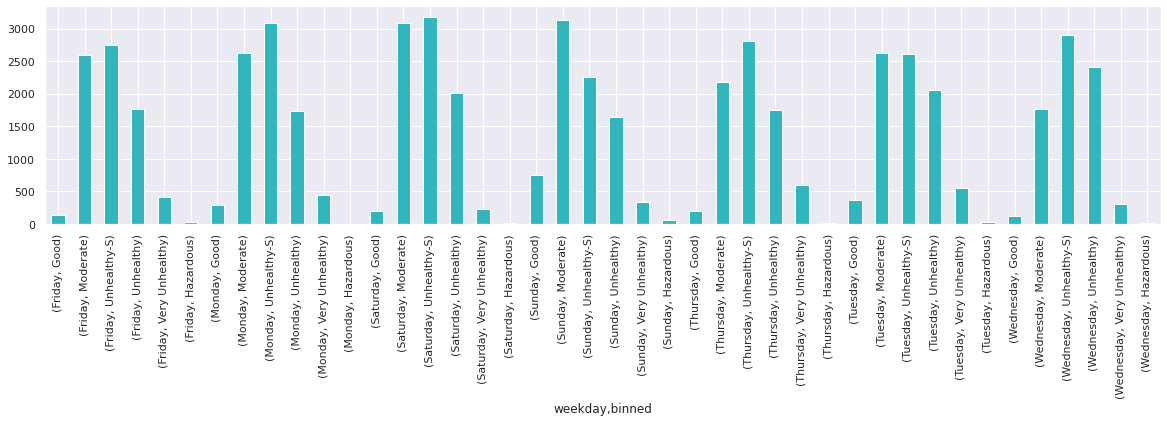

In [60]:
dfv[['weekday','binned', 'id']].groupby(['weekday','binned']).count().plot(kind='bar', color="#32b6bd", legend=None);

In [61]:
# Creating a separate broader 'binned' category column
dfv['binned-E'] = pd.cut(x=dfv['pm'], bins=[0, 12, 35, 55, 600], labels=['Good', 'Moderate', 'Unhealthy-S','Unhealthy-Hazardous'])

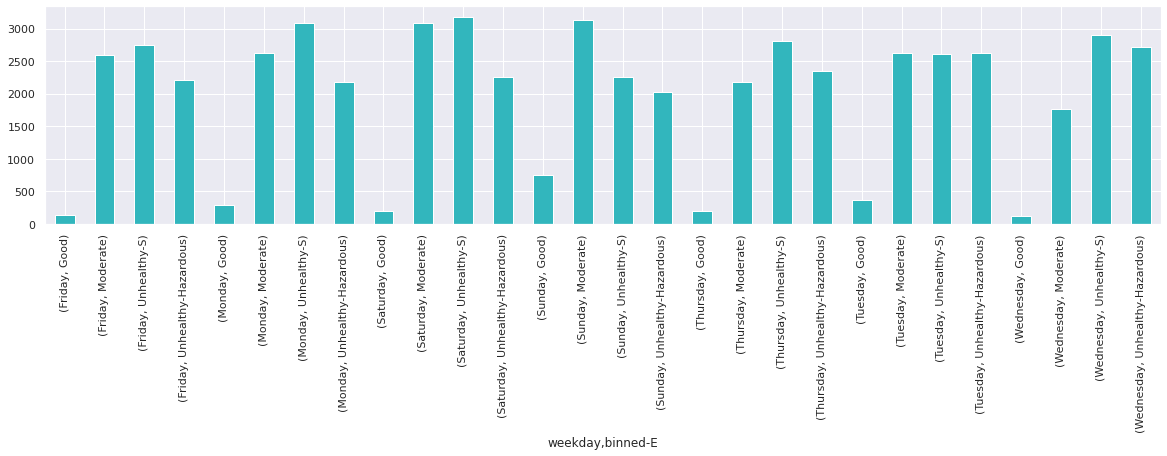

In [62]:
dfv[['weekday','binned-E', 'id']].groupby(['weekday','binned-E'],sort=False).count().plot(kind='bar', color="#32b6bd", legend=None);
# According to this classification of risk categories, Sunday has the highest 'Good' entries; 'Moderate' entries hit the 
# highest on Sunday with a declining trend seen through 

### Q. Which month has the highest no. of entries in the 'hazardous' and above categories?

In [63]:
# Checking number of entries in dataset per month
bins = [0,7,8,9,10]
labels = ['July', 'August', 'September','October']
m = dfv.groupby(pd.cut(dfv['month'], bins=bins, labels = labels)).size()
print(m)


month
July          3504
August       20383
September    18762
October      13403
dtype: int64


# About PM2.5 
- They are fine particulate matter less than 2.5 micrometres in diameter.

- At elevated levels, they reduce visibility, cause the air to appear hazy, and are a health concern.

- Some examples of PM2.5 are dust, spores, pollen and emissions from the combustion of diesel, gasoline, oil or wood.

- Elevated levels of PM2.5 can result in harmful effects such as heart disease, throat infections, lung cancer, chronic bronchitis, asthma attacks, and other respiratory diseases. 

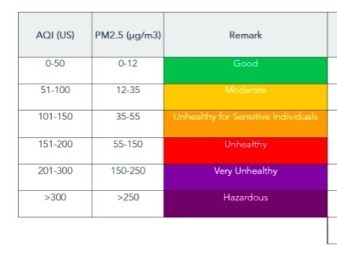

In [64]:
# Let's add a categorical column in regards to the PM2.5 levels 
# for easier and comprehensive analysis
air_df['AQI'] = ''
# check if new column has been created
air_df.head()

,created_at,date,time,month,year,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,AQI
0,2021-07-26 16:45:59+00:00,2021-07-26,16:45:59,Jul,2021,89,50,40.78,
1,2021-07-26 16:48:03+00:00,2021-07-26,16:48:03,Jul,2021,89,50,40.09,
2,2021-07-26 16:49:59+00:00,2021-07-26,16:49:59,Jul,2021,89,50,37.93,
3,2021-07-26 16:54:03+00:00,2021-07-26,16:54:03,Jul,2021,89,50,33.18,
4,2021-07-26 16:55:59+00:00,2021-07-26,16:55:59,Jul,2021,89,50,37.84,


In [65]:
# Let's add values to the Air Quality Index(AQI) Column
# depending on the PM2.5 Levels
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=0)&(air_df['PM2.5_ATM_ug/m3']<=12), 'AQI'] = 'Good'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=13)&(air_df['PM2.5_ATM_ug/m3']<=35), 'AQI'] = 'Moderate'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=36)&(air_df['PM2.5_ATM_ug/m3']<=55), 'AQI'] = 'Unhealthy sensitive'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=56)&(air_df['PM2.5_ATM_ug/m3']<=150), 'AQI'] = 'Unhealthy'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>=151)&(air_df['PM2.5_ATM_ug/m3']<=250), 'AQI'] = 'Very Unhealthy'
air_df.loc[(air_df['PM2.5_ATM_ug/m3']>250), 'AQI'] = 'Hazardous'


In [66]:
air_df.sample(10)

,created_at,date,time,month,year,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,AQI
11410,2021-08-12 22:18:51+00:00,2021-08-12,22:18:51,Aug,2021,84,65,194.20,Very Unhealthy
13663,2021-08-16 08:31:56+00:00,2021-08-16,08:31:56,Aug,2021,86,61,43.85,Unhealthy sensitive
10731,2021-08-11 10:53:07+00:00,2021-08-11,10:53:07,Aug,2021,85,64,34.35,Moderate
9238,2021-08-09 05:34:29+00:00,2021-08-09,05:34:29,Aug,2021,80,74,93.59,Unhealthy
8924,2021-08-08 19:06:17+00:00,2021-08-08,19:06:17,Aug,2021,80,72,68.58,Unhealthy
4680,2021-08-02 14:14:55+00:00,2021-08-02,14:14:55,Aug,2021,96,44,39.53,Unhealthy sensitive
24512,2021-09-01 20:26:30+00:00,2021-09-01,20:26:30,Sep,2021,83,67,51.77,Unhealthy sensitive
19113,2021-08-24 23:40:50+00:00,2021-08-24,23:40:50,Aug,2021,82,73,82.22,Unhealthy
20122,2021-08-26 12:59:26+00:00,2021-08-26,12:59:26,Aug,2021,86,63,20.18,Moderate
22028,2021-08-29 07:36:24+00:00,2021-08-29,07:36:24,Aug,2021,84,68,14.87,Moderate


## Exploratory Data Analysis

### Univariate Analysis

As we examine the shape of our data, we will perform univariate analysis.

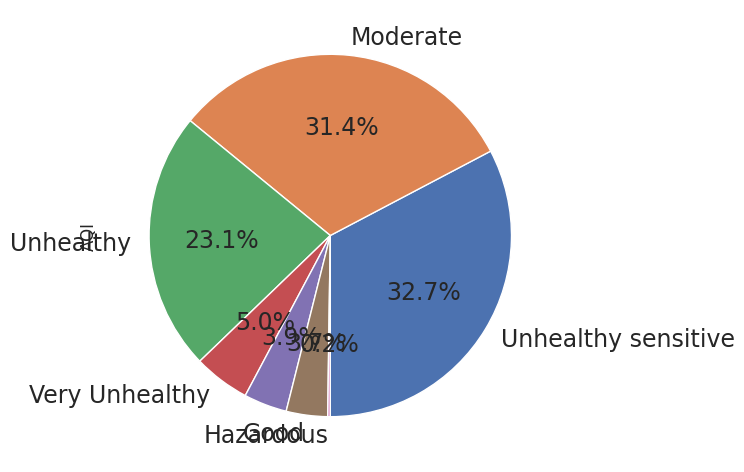

In [67]:
# Let's examine the Air quality index column
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)

Value = air_df.AQI.value_counts()

Value.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17)

From the pie chart we can see 32.7% of the air quality is in the **unhealthy sensitive**  category index. Only 6.7% of the air quality is in the **Good** category index. 

Lets create  a better visualization of this.

In [68]:
# Using a bar plot to visualize
# creating the bar plot
# Counting the occurrences of each unique category
GroupData=air_df.groupby(by='AQI').size()
print(GroupData)

AQI
                        2161
Good                    2067
Hazardous                128
Moderate               17581
Unhealthy              12963
Unhealthy sensitive    18334
Very Unhealthy          2818
dtype: int64


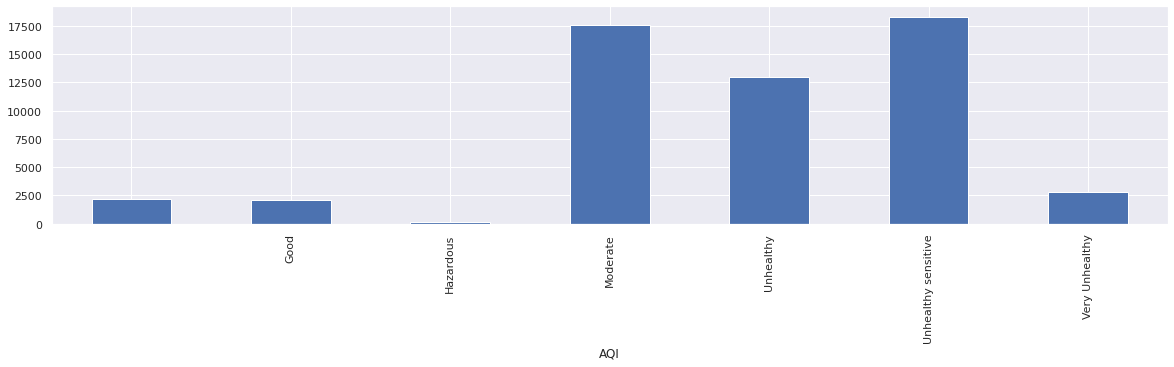

In [69]:
# Generating a bar chart for a single column
GroupData.plot.bar()

The air quality has mostly  been between the  **Moderate**,**Unhealthy** and **unhealthy** **sensitive** index ranges. 

The air quality has rarely been hazrdous as seen from the plot.

There are also observations that do not have a label to them.

### Bivariate Analysis

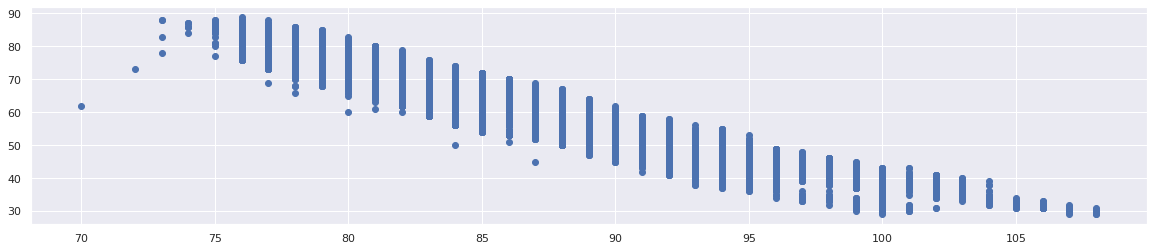

In [70]:
# Lets evaluate the relationship between Temperature and Humidity
x = air_df['Temperature_F']
y = air_df['Humidity_%']

plt.scatter(x, y)
plt.show()

Temperature and humidity have a strong negative correlation. As the temperature increases the humidity decreases.

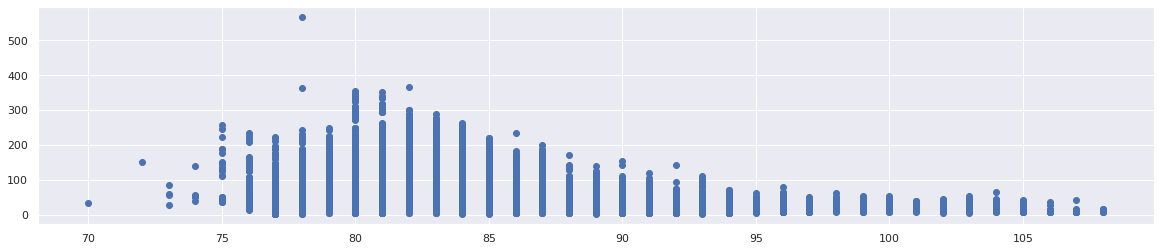

In [71]:
# Lets evaluate the relationship between Temperature and PM2.5
x = air_df['Temperature_F']
y = air_df['PM2.5_ATM_ug/m3']

plt.scatter(x, y)
plt.show()

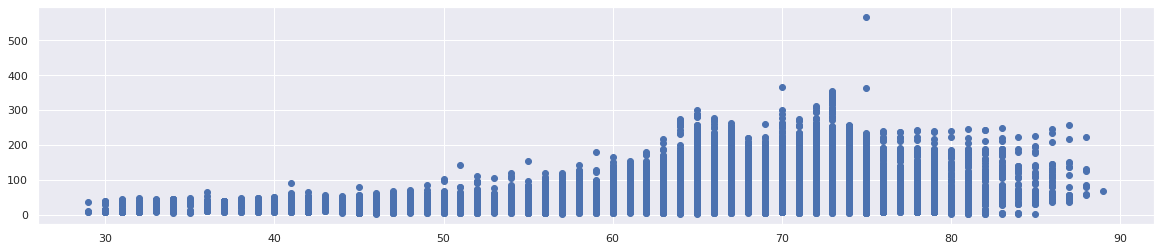

In [72]:
# Lets evaluate the relationship between PM2.5 and Humidity
x = air_df['Humidity_%']
y = air_df['PM2.5_ATM_ug/m3']

plt.scatter(x, y)
plt.show()

It seems that as humidity increases so does the level of PM2.5. We will create a correlation heat map to clearly see the strength of this relation.

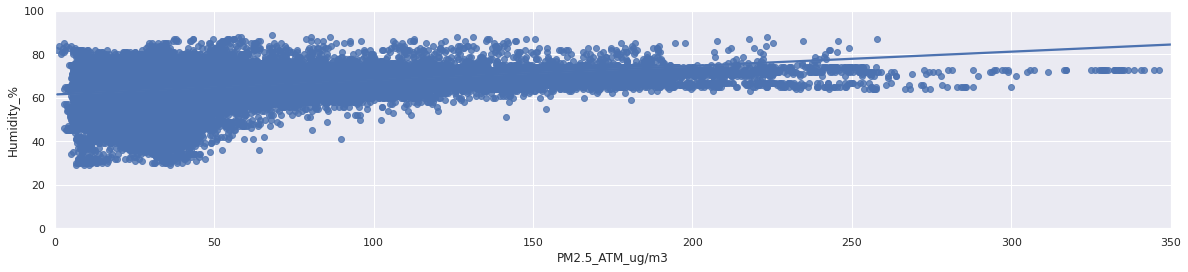

In [73]:
sns. regplot(x='PM2.5_ATM_ug/m3', y='Humidity_%', data=air_df)
plt.ylim(0,100)
plt.xlim(0,350)
sns.set(rc={"figure.figsize":(16,10)})

# using a diffferent scatter plot

By the up-trend of the line we can suggest that there is a rise in PM2.5 value when the Humidity increases 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



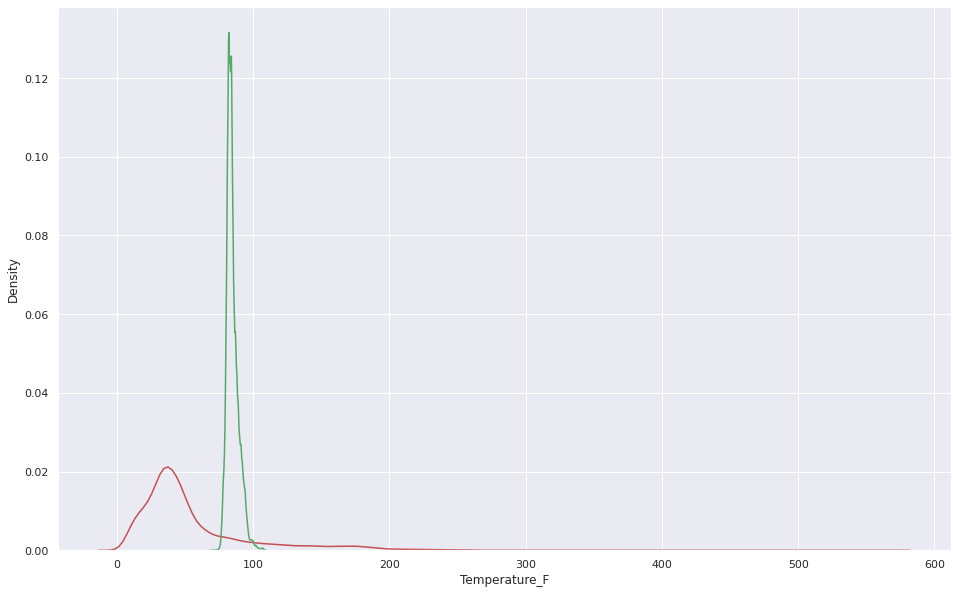

In [74]:
ax1 = sns.distplot(air_df['PM2.5_ATM_ug/m3'], hist=False ,color='r' , label='PM_VALUE')
sns.distplot(air_df['Temperature_F'],hist=False , color='g' , label ='TEMPERATURE', ax = ax1)

By the distribution plot we could conclude that the temperature does not contribute to the PM level. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



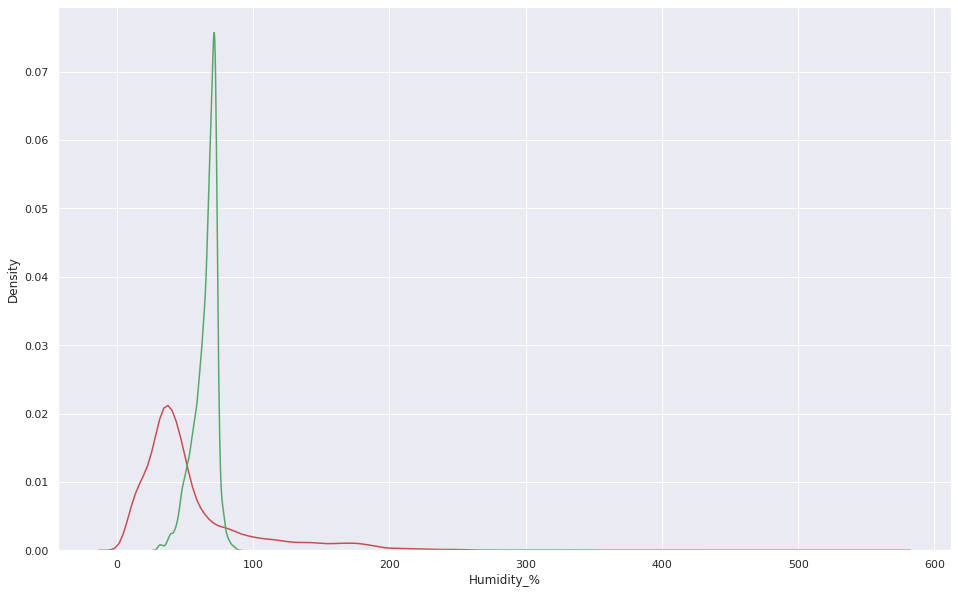

In [75]:
ax1 = sns.distplot(air_df['PM2.5_ATM_ug/m3'], hist=False ,color='r' , label='PM_VALUE')
sns.distplot(air_df['Humidity_%'],hist=False , color='g' , label ='HUMIDITY', ax = ax1)

The distinct curves clearly shows that the dependency of Humidity to that of PM level is considerably low.

In [76]:
# """"By ploting barplot between dates and the PM2.5 values we can analyse the exact day at which there is 
#  a maximum PM level present in the atmosphere """


# f = plt.figure()
# f.set_figwidth(20)
# f.set_figheight(20)

# sns.set(style="whitegrid")
# sns.barplot(air_df['Temperature_F'], air_df['created_at'], alpha=0.9)
# plt.title('PM2.5 BASED ON THE DATES ' , fontsize = 20)
# plt.ylabel('DATE', fontsize=18)
# plt.xlabel('PM2.5 VALUE', fontsize=18)
# plt.show()

# # The color indication helps in the identification of different months


## Notes

1)The Temperature's dependency over the PM2.5 level in the atmosphere is almost negligible.
2)The Humidity has no greater effects on the level of Particle Matter present in the atmosphere.
3)By analysing the dates we can observe that the PM values are random for each date and does not follow any trend or pattern.
4)The month of 'July' has comparatively lower data samples than other months but give a decent prediction, with highest PM value.
5)By observing the Down trend from the month of 'july to september' , there is again a rise in the PM level by 'October' month.

In [77]:
# creating stcked chart to show count of PM2.5 by month

# plt.figure(figsize=(8,5))
# sns.countplot(x='month',data=air_df, palette='rainbow', hue='PM2.5_ATM_ug/m3')
# plt.title("Air Quality by month, Divided by AQI")

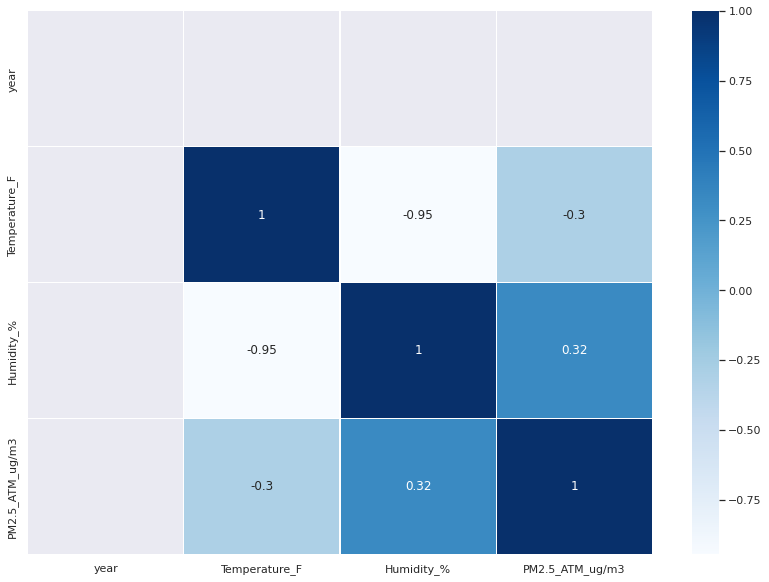

In [78]:
# correlation 
# Ploting a heatmat
# using seaborn 
# 
colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(air_df.corr(), cmap=colormap, annot=True, linewidths=0.2)

Temp and humidity have strong negative correlation.

Humidity and PM2.5 have a weak positive correlation

Temp and PM2.5 have a weak negative correlation.

In [79]:
df_s = df[['temp','humidity','pm']]
df_s.head()

,temp,humidity,pm
0,89,50,40.78
1,89,50,40.09
2,89,50,37.93
3,89,50,33.18
4,89,50,37.84


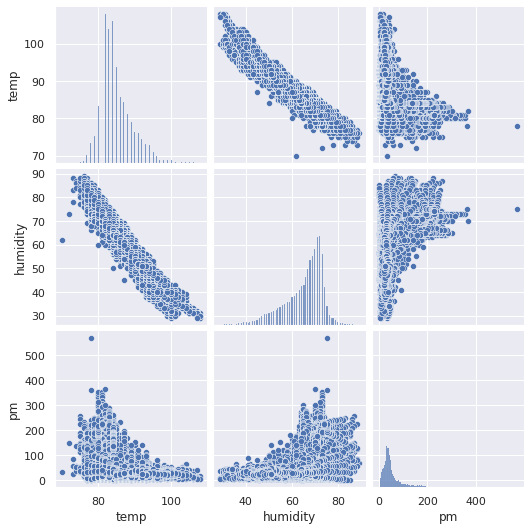

In [80]:
# Determining Correlation
col = df_s.columns
sns.pairplot(df[col]);

***Note:*** There is a high negative correlation between temperature and humidity.  This has significant value during the predictive modeling phase of the project. On the other hand, while not significant, a negative correlation exists between PM and temperature.  There exists a similar correlation (positive) between PM and humidity. 

In [82]:
#functions for extracting various useful columns from the orginal columns for more insight

#extracting days of the week
def days_of_weeks(row):
    if row['days_of_week'] == 0:
        return "Monday"
    elif row['days_of_week'] == 1:
        return "Tuesday"
    elif row['days_of_week'] == 2:
        return "Wenesday"
    elif row['days_of_week'] == 3:
        return "Thursday"
    elif row['days_of_week'] == 4:
        return "Friday"
    elif row['days_of_week'] == 5:
        return "Sarturday"
    elif row['days_of_week'] == 6:
        return "Sunday"
    else:
        return None
    
    
# extracting air quality categories   
def air_quality(row):
    if row['PM2.5_ATM_ug/m3'] <= 12:
        return "Good"
    elif 13 <= row['PM2.5_ATM_ug/m3'] <= 35:
        return "Moderate"
    elif 36 <= row['PM2.5_ATM_ug/m3'] <= 150:
        return "Unhealthy"
    elif 151 <= row['PM2.5_ATM_ug/m3'] <= 250:
        return "Very_Unhealthy"
    elif  row['PM2.5_ATM_ug/m3'] > 250:
        return "Hazardous"
    else:
        return None

#extracting months from the date column
def month(row):
    if row['month'] == 7:
        return "July"
    elif row['month'] == 8:
        return "August"
    elif row['month'] == 9:
        return "September"
    elif row['month'] == 10:
        return "October"
    else:
        return None
    
#etracting hour of the day (i.e AM oR PM)
def time(row):
    if row['hour'] > 11:
        return "PM"
    else:
        return "AM"

#extracting time in the week (i.e weekends or weekdays)
def weekdays_end(row):
    if row['days_of_week'] in [0,1,2,3,4]:
        return "Weekdays"
    else:
        return "Weekend"
    

In [84]:
# Let's separate the column created_at into date and time columns
air_df['date'] = pd.to_datetime(air_df['created_at']).dt.date
air_df['time'] = pd.to_datetime(air_df['created_at']).dt.time
air_df['day_of_month'] = pd.to_datetime(air_df['created_at']).dt.day
air_df['month'] = pd.to_datetime(air_df['created_at']).dt.month
air_df['year'] = pd.to_datetime(air_df['created_at']).dt.year
air_df['days_of_week'] = pd.to_datetime(air_df['created_at']).dt.dayofweek

In [85]:
air_df['day_in_week'] = air_df.apply(lambda row: days_of_weeks(row), axis=1)
air_df['weekdays_end'] = air_df.apply(lambda row: weekdays_end(row), axis=1)
air_df['month'] = air_df.apply(lambda row: month(row), axis=1)
air_df['hour'] = air_df['time'] 
air_df['hour'] = air_df.hour.apply(lambda x: pd.Series(str(x).split(":"))).astype(str).astype(int)
air_df['AM_PM'] = air_df.apply(lambda row: time(row), axis=1)
air_df['Air_quality'] = air_df.apply(lambda row: air_quality(row), axis=1)

In [86]:
# Rearranging the columns
air = air_df[['date', 'time','AM_PM','day_of_month','month','weekdays_end','year','day_in_week','Temperature_F', 'Humidity_%','PM2.5_ATM_ug/m3']]
# Let's check the rearrangement
air.head()

,date,time,AM_PM,day_of_month,month,weekdays_end,year,day_in_week,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26,16:45:59,PM,26,July,Weekdays,2021,Monday,89,50,40.78
1,2021-07-26,16:48:03,PM,26,July,Weekdays,2021,Monday,89,50,40.09
2,2021-07-26,16:49:59,PM,26,July,Weekdays,2021,Monday,89,50,37.93
3,2021-07-26,16:54:03,PM,26,July,Weekdays,2021,Monday,89,50,33.18
4,2021-07-26,16:55:59,PM,26,July,Weekdays,2021,Monday,89,50,37.84


In [87]:
def aggregate_values(all_data):
    
    features = []
    
    for i in all_data.columns:
        if (len(all_data[i].unique()) < 70) and i not in ['date','time','Temperature_F','Humidity_%','PM2.5_ATM_ug/m3']:
            features.append(i)
    
    
    
    def aggregate_unique_value(column):
        unique  = pd.DataFrame(all_data.groupby(column).agg({column:'count','Temperature_F':'sum', 
                                                                            'Humidity_%':'sum',
                                                                            'PM2.5_ATM_ug/m3':'sum'
                                                                           }))
        unique['AVG_Temperature_F'] = unique['Temperature_F']/unique[column]
        unique['AVG_Humidity_%'] = unique['Humidity_%']/unique[column]
        unique['AVG_PM2.5_ATM_ug/m3'] = unique['PM2.5_ATM_ug/m3']/unique[column]
        
        unique = unique[[column,'AVG_Temperature_F','AVG_Humidity_%','AVG_PM2.5_ATM_ug/m3']]
        
        unique.rename(columns={column : 'counts'},inplace = True)
        
        
        
        unique_MAX  = pd.DataFrame(all_data.groupby(column).agg({'Temperature_F':'max', 
                                                                            'Humidity_%':'max',
                                                                            'PM2.5_ATM_ug/m3':'max'
                                                                           }))
        
        unique_MAX.columns = ('MAX_Temperature_F','MAX_Humidity_%','MAX_PM2.5_ATM_ug/m3')
        
        
        unique_MIN  = pd.DataFrame(all_data.groupby(column).agg({'Temperature_F':'min', 
                                                                            'Humidity_%':'min',
                                                                            'PM2.5_ATM_ug/m3':'min'
                                                                           }))
        
        unique_MIN.columns = ('MIN_Temperature_F','MIN_Humidity_%','MIN_PM2.5_ATM_ug/m3')
        
        
        
        
        result = pd.concat([unique, unique_MAX,unique_MIN], axis=1)
        
        return result

    dropdown_menu = [k for k in features]

    return widgets.interact(aggregate_unique_value, column=dropdown_menu);

In [88]:
#checking the distribution of various air_quality
air_quality = pd.DataFrame(air_df.Air_quality.value_counts().reset_index())
air_quality.columns = ['Air_quality','number of records']
air_quality

,Air_quality,number of records
0,Unhealthy,31697
1,Moderate,17581
2,Very_Unhealthy,2818
3,Good,2067
4,Hazardous,128


In [90]:
# Let's import a further transformed dataset similar to the one above and get more insights.
air_clean =  pd.read_csv('/content/drive/MyDrive/AirQuality/Cleaned_data.csv')

In [91]:
# Lets check the data set
air_clean.head()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,date,time,day_of_month,month,year,days_of_week,day_in_week,weekdays_end,hour,AM_PM,Air_quality
0,198,89,50,40.78,2021-07-26,16:45:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
1,199,89,50,40.09,2021-07-26,16:48:03,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
2,200,89,50,37.93,2021-07-26,16:49:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy
3,201,89,50,33.18,2021-07-26,16:54:03,26,July,2021,0,Monday,Weekdays,16,PM,Moderate
4,202,89,50,37.84,2021-07-26,16:55:59,26,July,2021,0,Monday,Weekdays,16,PM,Unhealthy


Text(0.5, 1.0, 'Air Quality by Weekends/weekdays, Divided by AQI')

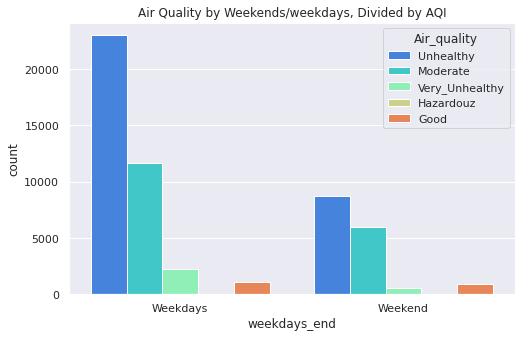

In [92]:
# Lets check the AQI in realtion to the week datys and weekends
plt.figure(figsize=(8,5))
sns.countplot(x='weekdays_end',data=air_clean, palette='rainbow', hue='Air_quality')
plt.title("Air Quality by Weekends/weekdays, Divided by AQI")

The air quality is mostly compromised on the weekdays according to the plot above. 

Text(0.5, 1.0, 'Air Quality by day in week, Divided by AQI')

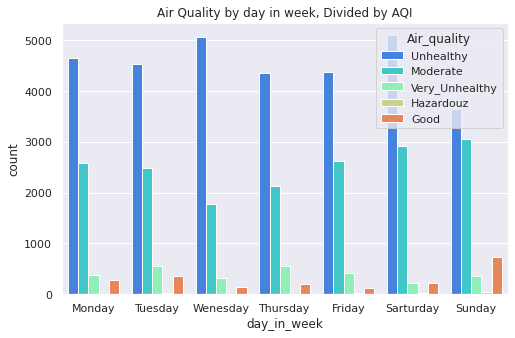

In [93]:
# Lets check the AQI in realtion to the week days 
plt.figure(figsize=(8,5))
sns.countplot(x='day_in_week',data=air_clean, palette='rainbow', hue='Air_quality')
plt.title("Air Quality by day in week, Divided by AQI")

On Wednesday's and Saturday's it seems the air quality is worse. However, the other days are not that much better off as they closely follow behind.

Text(0.5, 1.0, 'Air Quality by AM_PM, Divided by AQI')

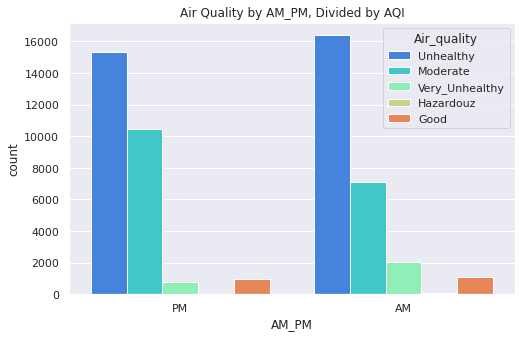

In [94]:
# Lets check the AQI in realtion to the AM_PM
plt.figure(figsize=(8,5))
sns.countplot(x='AM_PM',data=air_clean, palette='rainbow', hue='Air_quality')
plt.title("Air Quality by AM_PM, Divided by AQI")

The air quality is mostly compromised in the AM ie.morning.

The difference between the AM and PM isn't quite large though.